[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


             Average_Score
Country                   
France                7.98
Kingdom               8.26
Netherlands           7.70


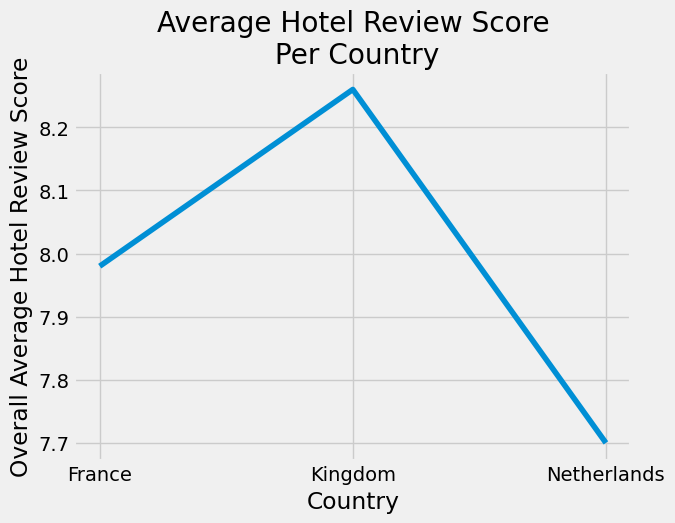

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
nltk.download('punkt')
style.use("fivethirtyeight")

DATASET_PATH = "Hotel_Reviews.csv"

# Reading only the 'Hotel_Address' and 'Average_Score' columns of the original data frame.
df = pd.read_csv(DATASET_PATH).loc[:, ["Hotel_Address", "Average_Score"]]

# Getting country names from each hotel address
df["Country"] = df["Hotel_Address"].str.split().str[-1]

# Dropping the hotel address column, which is unnecessary to have around now.
df.drop(columns=["Hotel_Address"], inplace=True)

# Grouping dataframe by country and getting the mean of the average score for each country.
df = df.groupby("Country").mean().round(2)

# Printing resulting data frame.
print(df)

# Graphing result.
plt.plot(df)
plt.xlabel("Country")
plt.ylabel("Overall Average Hotel Review Score")
plt.title("Average Hotel Review Score\n Per Country")
plt.show()

In [ ]:
import pandas as pd

F_DIRECTORY = "Hotel_Reviews.csv"

df = pd.read_csv(F_DIRECTORY)

positive_reviews = df["Positive_Review"].astype(str)
negative_reviews = df["Negative_Review"].astype(str)

for positive_review in positive_reviews:
    with open("positive_reviews.txt", "a") as fileObject:
        if positive_review != "No Positive":
            fileObject.write(positive_review.lower())
            fileObject.write("\n")

for negative_review in negative_reviews:
    with open("negative_reviews.txt", "a") as fileObject:
        if negative_review != "No Negative":
            fileObject.write(negative_review.lower())
            fileObject.write("\n")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import nltk
from nltk import word_tokenize
import random
from sklearn.model_selection import train_test_split

style.use("fivethirtyeight")

# Load the Hotel Reviews dataset
DATASET_PATH = "Hotel_Reviews.csv"
df = pd.read_csv(DATASET_PATH)

# Reading positive and negative reviews from files
with open("positive_reviews.txt", "r") as file:
    positive_reviews = file.readlines()
positive_reviews = [review.strip().lower() for review in positive_reviews if review.strip()]

with open("negative_reviews.txt", "r") as file:
    negative_reviews = file.readlines()
negative_reviews = [review.strip().lower() for review in negative_reviews if review.strip()]

# Preprocess and tokenize reviews
all_labeled_reviews = []
for review in positive_reviews:
    all_labeled_reviews.append((review, "pos"))
for review in negative_reviews:
    all_labeled_reviews.append((review, "neg"))

# Shuffle the labeled reviews
random.shuffle(all_labeled_reviews)

# Define feature extraction function
def extract_features_from(review):
    words = word_tokenize(review)
    return dict([(word, True) for word in words])

# Create feature sets for training and testing
feature_sets = [(extract_features_from(review), category) for review, category in all_labeled_reviews]
training_set, testing_set = train_test_split(feature_sets, test_size=0.3, random_state=42)



# Train Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set)

# Evaluate classifier accuracy
accuracy = nltk.classify.accuracy(classifier, testing_set)
print("Naive Bayes Classifier Accuracy: {:.2f}%".format(accuracy * 100))



Naive Bayes Classifier Accuracy: 91.29%


In [ ]:
def predict_sentiment(review):
    # Preprocess and tokenize the review
    review = review.strip().lower()
    words = word_tokenize(review)
    # Extract features
    features = extract_features_from(review)
    # Predict sentiment
    sentiment = classifier.classify(features)
    return sentiment

# Example of new reviews to predict sentiment for
new_review_1 = "The hotel staff was very friendly and helpful."
new_review_2 = "The room was dirty and smelled bad."

# Predict sentiment for the new reviews
sentiment_1 = predict_sentiment(new_review_1)
sentiment_2 = predict_sentiment(new_review_2)

# Print the predicted sentiments
print("Sentiment prediction for new review 1:", sentiment_1)
print("Sentiment prediction for new review 2:", sentiment_2)

Sentiment prediction for new review 1: pos
Sentiment prediction for new review 2: neg


In [ ]:
from sklearn.metrics import classification_report

# Get true labels and predicted labels for the testing set
true_labels = [category for _, category in testing_set]
nb_predictions = [classifier.classify(features) for features, _ in testing_set]

# Generate classification report for Naive Bayes
nb_report = classification_report(true_labels, nb_predictions, target_names=['neg', 'pos'])

# Calculate accuracy for Naive Bayes
nb_accuracy = nltk.classify.accuracy(classifier, testing_set)
print("Naive Bayes Classifier Accuracy: {:.2f}%".format(nb_accuracy * 100))

# Print classification report for Naive Bayes
print("Naive Bayes Classifier Classification Report:")
print(nb_report)



Naive Bayes Classifier Accuracy: 91.29%
Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

         neg       0.86      0.96      0.91      1959
         pos       0.97      0.87      0.92      2379

    accuracy                           0.91      4338
   macro avg       0.91      0.92      0.91      4338
weighted avg       0.92      0.91      0.91      4338



In [ ]:
import nltk
import random
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Read positive and negative reviews from files
with open("positive_reviews.txt", "r") as file:
    positive_reviews = file.readlines()
positive_reviews = [review.strip().lower() for review in positive_reviews if review.strip()]

with open("negative_reviews.txt", "r") as file:
    negative_reviews = file.readlines()
negative_reviews = [review.strip().lower() for review in negative_reviews if review.strip()]

# Create labeled review data
all_labeled_reviews = []
for review in positive_reviews:
    all_labeled_reviews.append((review, "pos"))
for review in negative_reviews:
    all_labeled_reviews.append((review, "neg"))

# Shuffle the labeled reviews
random.shuffle(all_labeled_reviews)

# Separate features and labels
X = [review for (review, label) in all_labeled_reviews]
y = [label for (review, label) in all_labeled_reviews]

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(lowercase=True, tokenizer=word_tokenize)

# Transform text data into TF-IDF vectors
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions using the trained classifier
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print("SVM Classifier Accuracy: {:.2f}%".format(svm_accuracy * 100))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


SVM Classifier Accuracy: 95.82%


In [ ]:
# New text data for prediction
new_text_data = [
    "This movie was fantastic! I loved every moment of it.",
    "The product was terrible. It didn't work at all."
]

# Tokenize the new text data
new_text_tokenized = [word_tokenize(review.lower()) for review in new_text_data]

# Transform tokenized text data into TF-IDF vectors
new_text_tfidf = vectorizer.transform([' '.join(tokens) for tokens in new_text_tokenized])

# Make predictions using the trained classifier
new_predictions = svm_classifier.predict(new_text_tfidf)

# Print the predictions
for i, prediction in enumerate(new_predictions):
    print("Review:", new_text_data[i])
    print("Predicted sentiment:", prediction)


Review: This movie was fantastic! I loved every moment of it.
Predicted sentiment: pos
Review: The product was terrible. It didn't work at all.
Predicted sentiment: neg


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
svm_report = classification_report(y_test, y_pred, target_names=['neg', 'pos'])

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print("SVM Classifier Accuracy: {:.2f}%".format(svm_accuracy * 100))

# Print classification report
print("SVM Classifier Classification Report:")
print(svm_report)


SVM Classifier Accuracy: 94.11%
SVM Classifier Classification Report:
              precision    recall  f1-score   support

         neg       0.92      0.95      0.94      2404
         pos       0.96      0.93      0.94      2828

    accuracy                           0.94      5232
   macro avg       0.94      0.94      0.94      5232
weighted avg       0.94      0.94      0.94      5232



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import nltk
from nltk import word_tokenize
import random

style.use("fivethirtyeight")

# Load the Hotel Reviews dataset
DATASET_PATH = "Hotel_Reviews.csv"
df = pd.read_csv(DATASET_PATH)

# Reading positive and negative reviews from files
with open("positive_reviews.txt", "r") as file:
    positive_reviews = file.readlines()
positive_reviews = [review.strip().lower() for review in positive_reviews if review.strip()]

with open("negative_reviews.txt", "r") as file:
    negative_reviews = file.readlines()
negative_reviews = [review.strip().lower() for review in negative_reviews if review.strip()]

# Preprocess and tokenize reviews
all_labeled_reviews = []
for review in positive_reviews:
    all_labeled_reviews.append((review, "pos"))
for review in negative_reviews:
    all_labeled_reviews.append((review, "neg"))

# Shuffle the labeled reviews
random.shuffle(all_labeled_reviews)

# Define feature extraction function
def extract_features_from(review):
    words = word_tokenize(review)
    return dict([(word, True) for word in words])

# Create feature sets for training and testing
feature_sets = [(extract_features_from(review), category) for review, category in all_labeled_reviews]
training_set, testing_set = feature_sets[500:], feature_sets[:500]


# Train Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set)

# Evaluate classifier accuracy
accuracy = nltk.classify.accuracy(classifier, testing_set)
print("Naive Bayes Classifier Accuracy: {:.2f}%".format(accuracy * 100))



Naive Bayes Classifier Accuracy: 88.80%
